In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set tight_layout as default
plt.rcParams['figure.autolayout'] = True


SAVE_PLOTS = True
STANDARD_DPI = 300
FIGSIZE = (5, 5)
DOTSIZE = 5

In [9]:

pmt_number = 1
is_attenuated = False


def get_data(pmt_number, is_attenuated):
    data_path = f'data/dark_pmt/pmt{pmt_number}/I_V_noise_700_2285V'
    data_path += '_50ohm.csv' if is_attenuated else '.csv'
    return pd.read_csv(data_path)


def generate_plot_title(quantity_name, pmt_number, is_terminated: bool):
    plot_title = quantity_name
    plot_title += ' - '
    plot_title += f'PMT {pmt_number}'
    plot_title += ' , '
    plot_title += r' 50$\Omega$ term.' if is_terminated else r' 1$M\Omega$ term.'
    return plot_title

/tmp/ipykernel_233635/1685562397.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks()*1e6)


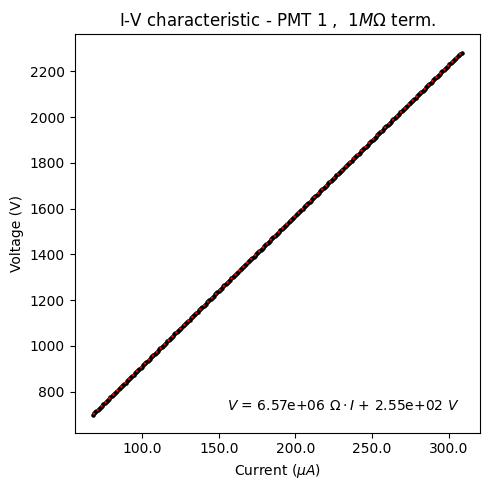

/tmp/ipykernel_233635/1685562397.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks()*1e6)


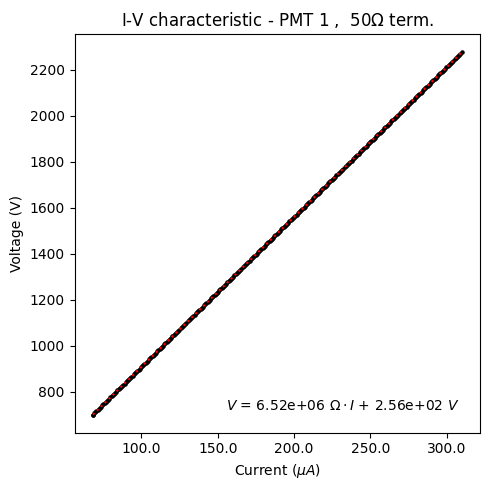

/tmp/ipykernel_233635/1685562397.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks()*1e6)


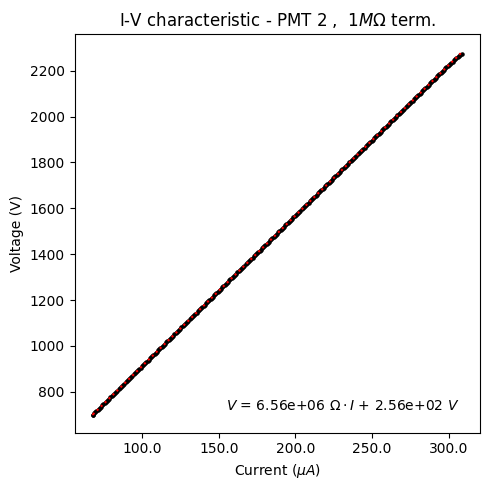

/tmp/ipykernel_233635/1685562397.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks()*1e6)


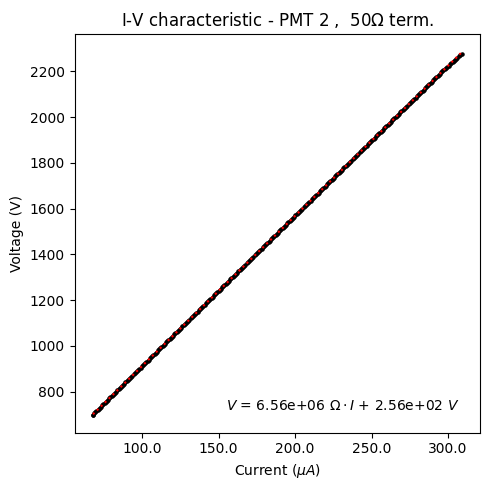

In [12]:
def plot_I_V_characteristic_and_fit(pmt_number, is_terminated):
    noise_data = get_data(pmt_number, is_terminated)

    fig, ax = plt.subplots(figsize=FIGSIZE)
    V = noise_data['pmt_high_voltage']
    I = noise_data['pmt_current']/1e6

    m, b = np.polyfit(I, V, 1)
    ax.plot(I, m*I + b, color='red', linestyle='dotted')
    ax.text(0.95, 0.05, rf'$V$ = {m:.2e} $\Omega \cdot I$ + {b:.2e} $V $',
            ha='right', va='bottom', transform=ax.transAxes, color='black')

    # current is in amperes, rescale the x axis ticks to microamperes
    ax.set_xticklabels(ax.get_xticks()*1e6)

    ax.scatter(I, V, color='black', s=DOTSIZE)
    ax.set_xlabel(r'Current $(\mu A)$')
    ax.set_ylabel('Voltage (V)')
    plot_title = generate_plot_title(
        'I-V characteristic', pmt_number, is_terminated)
    ax.set_title(plot_title)

    if SAVE_PLOTS:
        plot_path = f'plots/pmt_noise_tests/pmt{pmt_number}/I_V_characteristic_and_fit'
        plot_path += '_50ohm' if is_terminated else ''
        plot_path += '.jpg'
        plt.savefig(plot_path, dpi=STANDARD_DPI, bbox_inches='tight')

    plt.show()


for pmt_number in range(1, 3):
    for is_terminated in [False, True]:
        plot_I_V_characteristic_and_fit(pmt_number, is_terminated)

In [5]:

noise_data = pd.read_csv('data/dark_pmt/pmt1/I_V_noise_700_2285V.csv')
noise_data['V_set'] = noise_data['pmt_high_voltage'].round()
noise_data.head()

,time,pmt_high_voltage,pmt_current,v_p2p_ch1,v_rms_ch1,v_p2p_ch2,v_rms_ch2,V_set
0,1.741440e+09,700.1,67.780,0.0400,0.010568,0.0408,0.012731,700.0
1,1.741440e+09,705.1,68.495,0.0424,0.011586,0.0424,0.011411,705.0
2,1.741440e+09,710.1,69.305,0.0448,0.012768,0.0408,0.011308,710.0
3,1.741440e+09,715.1,70.055,0.0408,0.011300,0.0400,0.009989,715.0
4,1.741440e+09,719.8,70.820,0.0448,0.010078,0.0416,0.012973,720.0


# Characteristics of power supply

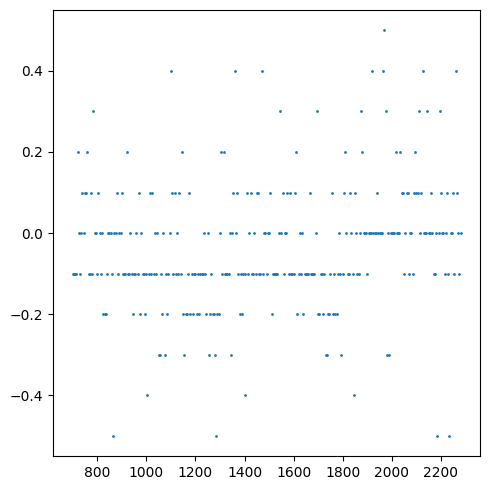

In [6]:
v_delta = noise_data['V_set'] - noise_data['pmt_high_voltage']
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(noise_data['V_set'], v_delta, s=1)